In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense #helps me to create HL
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.shape

(1030, 9)

In [6]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

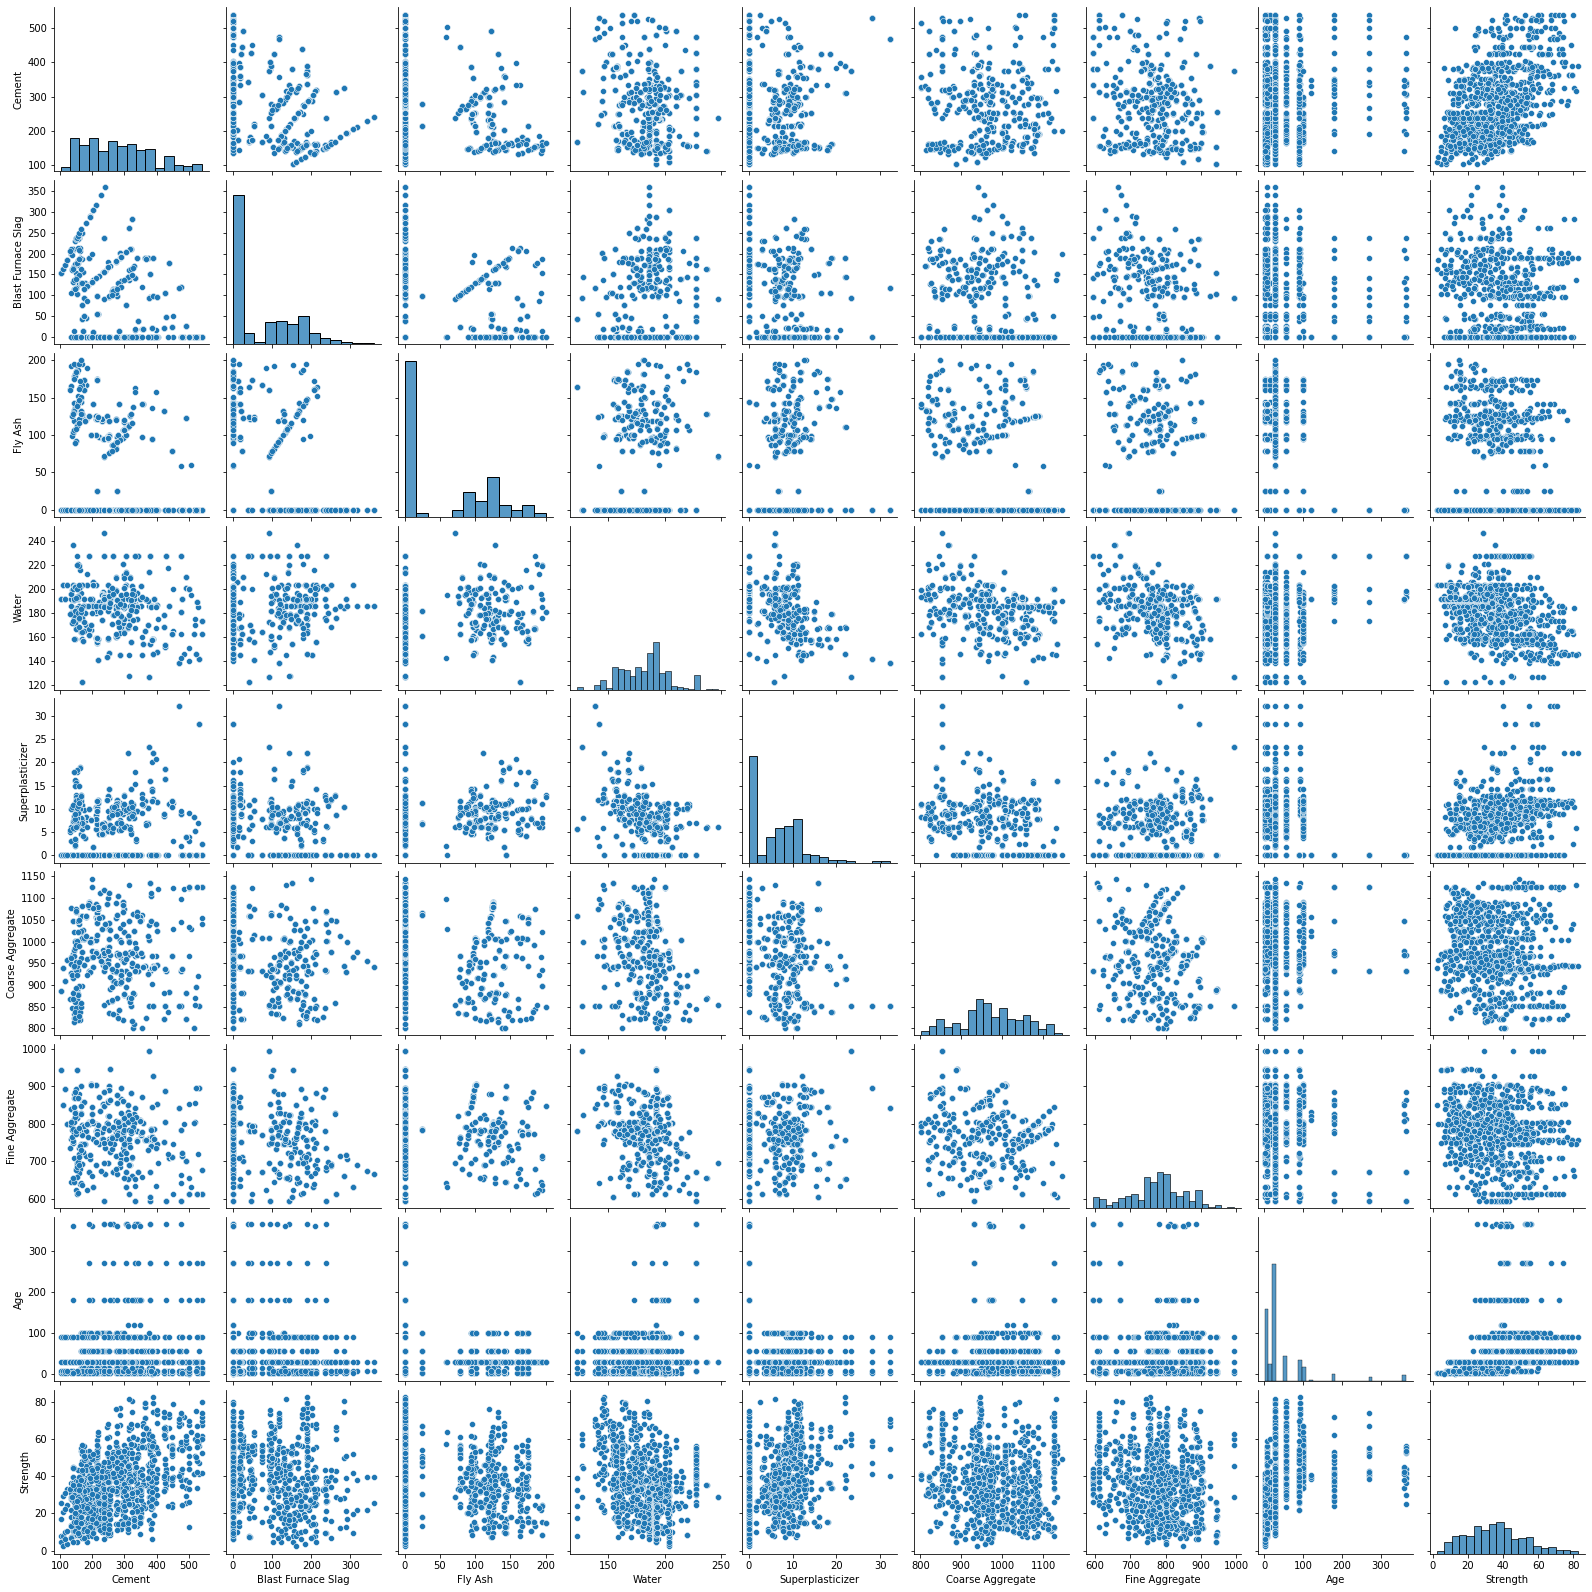

In [7]:
sns.pairplot(df)

Text(0.5, 0, 'Cement')

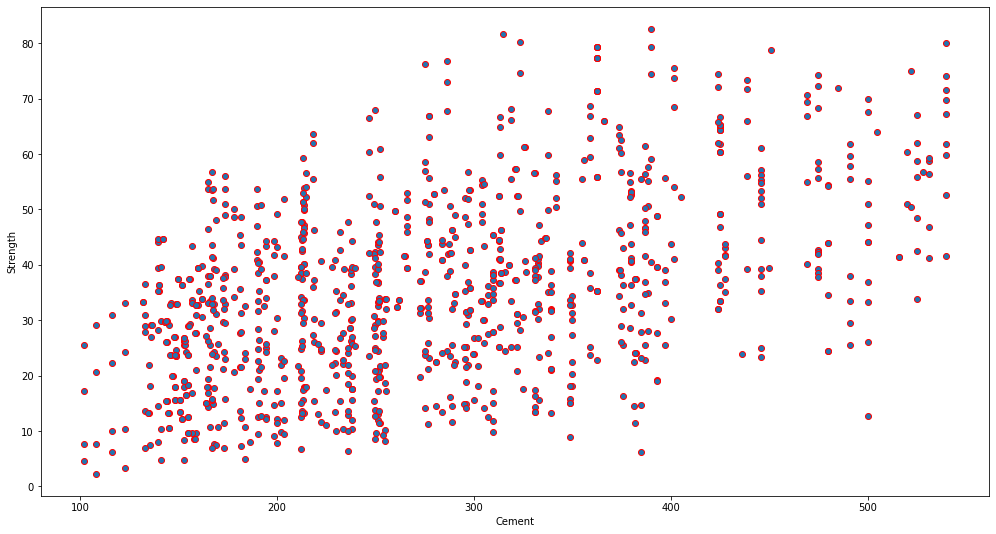

In [8]:
# scatter plot of Water and Cement
plt.figure(figsize=[17,9])
plt.scatter(y='Strength',x='Cement',edgecolors='red',data=df)
plt.ylabel('Strength')
plt.xlabel('Cement')

Text(0.5, 0, 'Fly Ash')

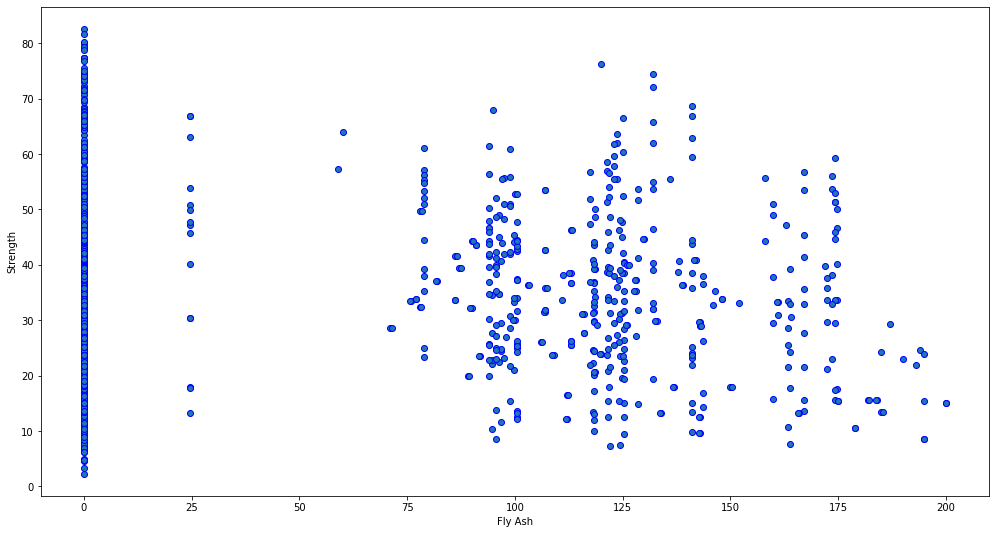

In [9]:
plt.figure(figsize=[17,9])
plt.scatter(y='Strength',x='Fly Ash',edgecolors='blue',data=df)
plt.ylabel('Strength')
plt.xlabel('Fly Ash')

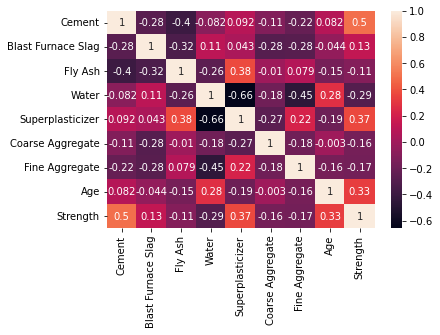

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
df.corr()["Strength"].sort_values()

Water                -0.289633
Fine Aggregate       -0.167241
Coarse Aggregate     -0.164935
Fly Ash              -0.105755
Blast Furnace Slag    0.134829
Age                   0.328873
Superplasticizer      0.366079
Cement                0.497832
Strength              1.000000
Name: Strength, dtype: float64

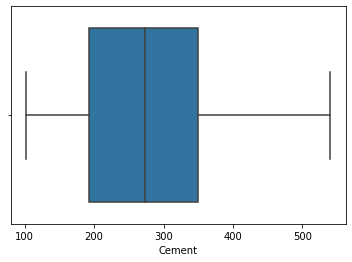

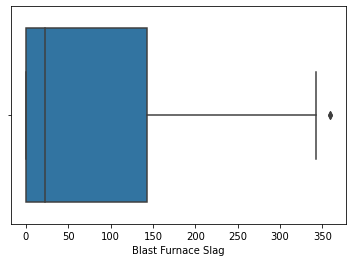

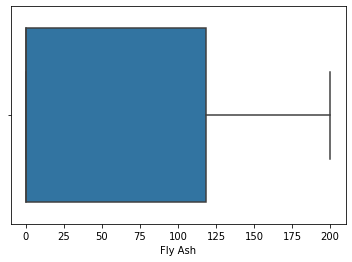

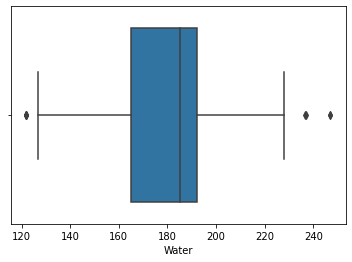

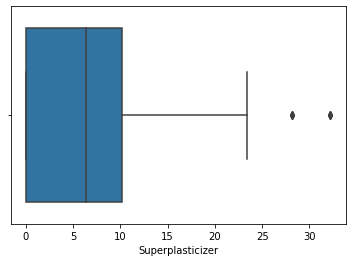

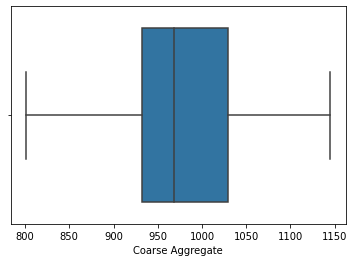

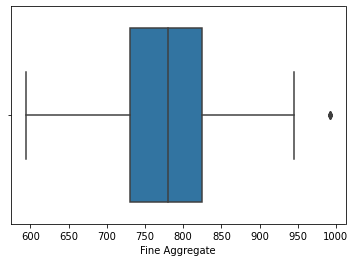

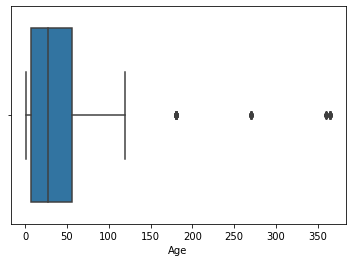

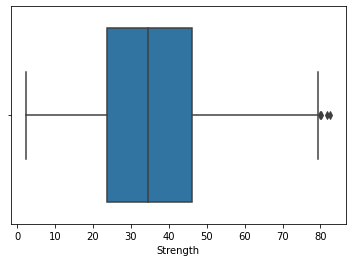

In [12]:
l=['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age','Strength']
for i in l:
    sns.boxplot(x=df[i])
    plt.show()

In [13]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values 

In [14]:
x

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.3, random_state=1)

In [17]:
ann= Sequential()
ann.add(Dense(units=16, activation="relu"))
ann.add(Dense(units=10, activation="relu"))
ann.add(Dense(units=8, activation="relu"))
ann.add(Dense(units=1))

ann.compile(optimizer="adam", loss="mse")

In [18]:
ann.fit(xtrain,ytrain,epochs=250)

Epoch 1/250
23/23 [==============================] - 1s 1ms/step - loss: 1539.4303
Epoch 2/250
23/23 [==============================] - 0s 1ms/step - loss: 1494.6891
Epoch 3/250
23/23 [==============================] - 0s 1ms/step - loss: 1428.7732
Epoch 4/250
23/23 [==============================] - 0s 1ms/step - loss: 1340.2163
Epoch 5/250
23/23 [==============================] - 0s 1ms/step - loss: 1217.0570
Epoch 6/250
23/23 [==============================] - 0s 1ms/step - loss: 1046.2063
Epoch 7/250
23/23 [==============================] - 0s 1ms/step - loss: 817.7250
Epoch 8/250
23/23 [==============================] - 0s 1ms/step - loss: 561.4861
Epoch 9/250
23/23 [==============================] - 0s 2ms/step - loss: 358.8032
Epoch 10/250
23/23 [==============================] - 0s 2ms/step - loss: 263.4171
Epoch 11/250
23/23 [==============================] - 0s 1ms/step - loss: 231.5251
Epoch 12/250
23/23 [==============================] - 0s 2ms/step - loss: 216.9567
Epoch 1

In [19]:
loss=pd.DataFrame(ann.history.history)
loss.head()

,loss
0,1539.430298
1,1494.689087
2,1428.773193
3,1340.216309
4,1217.057007


In [20]:
loss.tail()

,loss
245,31.135126
246,30.713360
247,30.728907
248,31.240129
249,31.471369


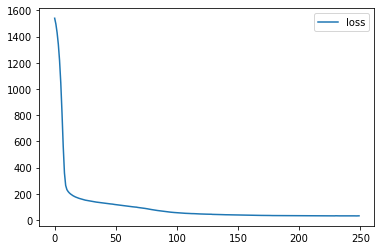

In [21]:
loss.plot()

In [22]:
ann.evaluate(xtrain,ytrain)

23/23 [==============================] - 0s 1ms/step - loss: 30.3240


30.323991775512695

In [23]:
ann.evaluate(xtest,ytest)

10/10 [==============================] - 0s 1ms/step - loss: 44.0517


44.05165481567383

In [24]:
ypred=ann.predict(xtest)

In [25]:
dic={"Actual Y":ytest,"Predicted Y":ypred.flatten()}
df1=pd.DataFrame(dic)

In [26]:
df1.head()

,Actual Y,Predicted Y
0,21.91,17.945848
1,19.93,10.878325
2,36.44,19.423267
3,11.96,11.604949
4,39.84,31.323931


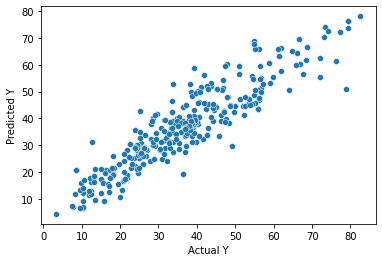

In [27]:
sns.scatterplot(x="Actual Y",y="Predicted Y", data=df1)
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
print(f"MSE-: {mean_squared_error(ytest,ypred)}")
print(f"RMSE-:{np.sqrt(mean_squared_error(ytest,ypred))}")

MSE-: 44.0516562113849
RMSE-:6.637142172003316


In [29]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [30]:
newdata=[[159,186,0,175,11,989,788,28]]

newdata=sc.transform(newdata)

ann.predict(newdata)

array([[31.148994]], dtype=float32)

In [31]:
from tensorflow.keras.models import load_model
ann.save("Demo_Strength")

INFO:tensorflow:Assets written to: Demo_Strength/assets


In [32]:
fr=load_model("Demo_Strength")

In [33]:
fr.predict(newdata)

array([[31.148994]], dtype=float32)